In [1]:
#https://github.com/likejazz/jupyter-notebooks/tree/master/deep-learning/keras-attention
#>> https://github.com/datalogue/keras-attention.git

!git clone https://github.com/jukyellow/keras-attention.git

Cloning into 'keras-attention'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 154 (delta 4), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (154/154), 15.63 MiB | 7.76 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
ls -alrt

total 20
drwxr-xr-x 1 root root 4096 Oct 25 16:58 sample_data/
drwxr-xr-x 1 root root 4096 Oct 30 15:14 .config/
drwxr-xr-x 1 root root 4096 Nov  3 08:42 ../
drwxr-xr-x 1 root root 4096 Nov  3 08:44 ./
drwxr-xr-x 7 root root 4096 Nov  3 08:44 keras-attention/


In [2]:
cd keras-attention

/content/keras-attention


In [0]:
#!pip install -r requirements-gpu.txt

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 901kB 2.7MB/s 


In [0]:
ls -alrt

total 100
drwxr-xr-x 1 root root  4096 Oct 31 16:45 ../
-rw-r--r-- 1 root root 34520 Oct 31 16:45 LICENSE
-rw-r--r-- 1 root root  1157 Oct 31 16:45 .gitignore
-rw-r--r-- 1 root root  3968 Oct 31 16:45 run.py
-rw-r--r-- 1 root root    76 Oct 31 16:45 requirements.txt
-rw-r--r-- 1 root root    80 Oct 31 16:45 requirements-gpu.txt
-rw-r--r-- 1 root root  4329 Oct 31 16:45 README.md
drwxr-xr-x 2 root root  4096 Oct 31 16:45 models/
-rw-r--r-- 1 root root     0 Oct 31 16:45 __init__.py
-rw-r--r-- 1 root root   140 Oct 31 16:45 examples.txt
drwxr-xr-x 2 root root  4096 Oct 31 16:45 data/
drwxr-xr-x 2 root root  4096 Oct 31 16:45 weights/
-rw-r--r-- 1 root root  6341 Oct 31 16:45 visualize.py
drwxr-xr-x 2 root root  4096 Oct 31 16:45 utils/
drwxr-xr-x 7 root root  4096 Oct 31 16:45 ./
drwxr-xr-x 8 root root  4096 Oct 31 16:45 .git/


In [5]:
!python data/generate.py

creating dataset
dataset created.


In [7]:
ls -alrt
#ex) validation.csv
#"17.02.72","1972-02-17"
#"9 JULIO, 2013","2013-07-09"

total 15360
-rw-r--r-- 1 root root      115 Nov  3 08:44 sample_machine_vocab.json
-rw-r--r-- 1 root root    21714 Nov  3 08:44 sample_human_vocab.json
-rw-r--r-- 1 root root     4822 Nov  3 08:44 reader.py
-rw-r--r-- 1 root root     3549 Nov  3 08:44 generate.py
drwxr-xr-x 7 root root     4096 Nov  3 08:44 ../
-rw-r--r-- 1 root root 15614604 Nov  3 08:45 training.csv
-rw-r--r-- 1 root root      115 Nov  3 08:45 machine_vocab.json
-rw-r--r-- 1 root root    21153 Nov  3 08:45 human_vocab.json
drwxr-xr-x 2 root root     4096 Nov  3 08:45 ./
-rw-r--r-- 1 root root    30994 Nov  3 08:45 validation.csv


In [6]:
#epochs default 50! but long time, I set 5 times

!python run.py  #fit하면서 ModelCheckpoint로 weights값을 저장해둠

Using TensorFlow backend.
Namespace(batch_size=32, epochs=5, gpu='0', padding=5, training_data='./data/training.csv', validation_data='./data/validation.csv')
Loading datasets.
Datasets Loaded.
Compiling Model.






2019-11-03 10:13:52.680742: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-11-03 10:13:52.681036: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x18a9640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-11-03 10:13:52.681068: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-11-03 10:13:52.686815: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-03 10:13:52.813635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [8]:
#https://github.com/jukyellow/keras-attention/blob/master/visualize.py

import argparse
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from models.NMT import simpleNMT
from utils.examples import run_example
from data.reader import Vocabulary

Using TensorFlow backend.


In [9]:
#HERE = os.path.realpath(os.path.join(os.path.realpath(__file__), '..'))
HERE = os.path.realpath(os.path.join(os.path.abspath(''), '..'))
print('HERE: ', HERE)

def load_examples(file_name):
    with open(file_name) as f:
        return [s.replace('\n', '') for s in f.readlines()]

# create a directory if it doesn't already exist
if not os.path.exists(os.path.join(HERE, 'attention_maps')):
    os.makedirs(os.path.join(HERE, 'attention_maps'))

SAMPLE_HUMAN_VOCAB = os.path.join(HERE, 'keras-attention/data', 'sample_human_vocab.json')
SAMPLE_MACHINE_VOCAB = os.path.join(HERE, 'keras-attention/data', 'sample_machine_vocab.json')
#이미 커밋된 weights값으로 테스트함...
SAMPLE_WEIGHTS = os.path.join(HERE, 'keras-attention/weights', 'sample_NMT.49.0.01.hdf5')     
print('SAMPLE_HUMAN_VOCAB:',SAMPLE_HUMAN_VOCAB)

class Visualizer(object):

    def __init__(self,
                 padding=None,
                 input_vocab=SAMPLE_HUMAN_VOCAB,
                 output_vocab=SAMPLE_MACHINE_VOCAB):
        """
            Visualizes attention maps
            :param padding: the padding to use for the sequences.
            :param input_vocab: the location of the input human
                                vocabulary file
            :param output_vocab: the location of the output 
                                 machine vocabulary file
        """
        self.padding = padding
        self.input_vocab = Vocabulary(
            input_vocab, padding=padding)
        self.output_vocab = Vocabulary(
            output_vocab, padding=padding)

    def set_models(self, pred_model, proba_model):
        """
            Sets the models to use
            :param pred_model: the prediction model
            :param proba_model: the model that outputs the activation maps
        """
        self.pred_model = pred_model
        self.proba_model = proba_model

    def attention_map(self, text):
        """
            Text to visualze attention map for.
        """
        # encode the string
        d = self.input_vocab.string_to_int(text)
        print('d: ', d)

        # get the output sequence
        predicted_text = run_example(self.pred_model, self.input_vocab, self.output_vocab, text)
        print('predicted_text: ', predicted_text)

        text_ = list(text) + ['<eot>'] + ['<unk>'] * self.input_vocab.padding
        # get the lengths of the string
        input_length = len(text)+1
        output_length = predicted_text.index('<eot>')+1
        # get the activation map
        activation_map = np.squeeze(self.proba_model.predict(np.array([d])))[0:output_length, 0:input_length]
        print('activation_map: ', activation_map)
        # [[1.04707105e-05 1.22802967e-05 8.08871482e-06 2.06340337e-05
        #   9.13377789e-06 8.17141245e-06 2.89358250e-05 1.30348863e-05
        #   3.70874773e-06 1.70587246e-05 7.16923250e-06 4.97975234e-05
        #   4.53671564e-05 2.57728461e-05 2.45305255e-05 3.59793594e-05
        #   1.75800902e-04 3.21106811e-04 2.58878747e-04 9.57598037e-04]
        # [2.88392557e-03 2.04139692e-03 8.94600758e-04 1.82232610e-03
        #  ...

        # import seaborn as sns
        plt.clf()
        f = plt.figure(figsize=(8, 8.5))
        ax = f.add_subplot(1, 1, 1)

        # add image
        i = ax.imshow(activation_map, interpolation='nearest', cmap='gray') #weight값을 회색으로 표시...
        
        # add colorbar
        cbaxes = f.add_axes([0.2, 0, 0.6, 0.03])
        cbar = f.colorbar(i, cax=cbaxes, orientation='horizontal')
        cbar.ax.set_xlabel('Probability', labelpad=2)

        # add labels
        ax.set_yticks(range(output_length))
        ax.set_yticklabels(predicted_text[:output_length])
        
        ax.set_xticks(range(input_length))
        ax.set_xticklabels(text_[:input_length], rotation=45)
        
        ax.set_xlabel('Input Sequence')
        ax.set_ylabel('Output Sequence')

        # add grid and legend
        ax.grid()
        # ax.legend(loc='best')

        f.savefig(os.path.join(HERE, 'attention_maps', text.replace('/', '')+'.pdf'), bbox_inches='tight')
        f.show()

HERE:  /content
SAMPLE_HUMAN_VOCAB: /content/keras-attention/data/sample_human_vocab.json


In [0]:
def main(examples, args):
    print('Total Number of Examples:', len(examples))
    weights_file = os.path.expanduser(SAMPLE_WEIGHTS)
    print('Weights loading from:', weights_file)
    viz = Visualizer(padding=50,
                     input_vocab=SAMPLE_HUMAN_VOCAB,
                     output_vocab=SAMPLE_MACHINE_VOCAB)
    print('Loading models')
    pred_model = simpleNMT(trainable=False,
                           pad_length=50,
                           n_chars=viz.input_vocab.size(),
                           n_labels=viz.output_vocab.size())

    pred_model.load_weights(weights_file, by_name=True)
    pred_model.compile(optimizer='adam', loss='categorical_crossentropy')

    proba_model = simpleNMT(trainable=False,
                            pad_length=50,
                            n_chars=viz.input_vocab.size(),
                            n_labels=viz.output_vocab.size(),
                            return_probabilities=True)

    proba_model.load_weights(weights_file, by_name=True)
    proba_model.compile(optimizer='adam', loss='categorical_crossentropy')

    viz.set_models(pred_model, proba_model)

    print('Models loaded')

    for example in examples:
        viz.attention_map(example)

    print('Completed visualizations')

Total Number of Examples: 10
Weights loading from: /content/keras-attention/weights/sample_NMT.49.0.01.hdf5
Loading models









inputs shape: (?, ?, 512)


inputs shape: (?, ?, 512)
Models loaded
d:  [635, 919, 657, 739, 919, 970, 640, 880, 1100, 880, 593, 1345, 251, 363, 1425, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
predicted_text:  ['2', '0', '1', '6', '-', '0', '1', '-', '0', '5', '<eot>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>']
activation_map:  [[3.63950785e-05 6.94214541e-05 5.30203179e-05 8.81299129e-05


<Figure size 432x288 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

<Figure size 576x612 with 0 Axes>

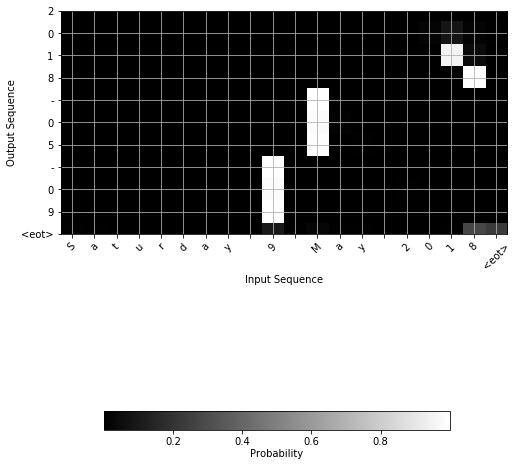

In [11]:
if __name__ == '__main__':

    # parser = argparse.ArgumentParser()
    # named_args = parser.add_argument_group('named arguments')

    # named_args.add_argument('-e', '--examples', metavar='|',
    #                         help='Example string/file to visualize attention map for
    #                                 If file, it must end with '.txt'',
    #                         required=True)
    # print('named_args: ', named_args)

    # named_args.add_argument('-w', '--weights', metavar='|',
    #                         help='Location of weights',
    #                         required=False,
    #                         default=SAMPLE_WEIGHTS)
    # named_args.add_argument('-p', '--padding', metavar='|',
    #                         help='Length of padding',
    #                         required=False, default=50, type=int)
    # named_args.add_argument('-hv', '--human-vocab', metavar='|',
    #                         help='Path to the human vocabulary',
    #                         required=False,
    #                         default=SAMPLE_HUMAN_VOCAB,
    #                         type=str)
    # named_args.add_argument('-mv', '--machine-vocab', metavar='|',
    #                         help='Path to the machine vocabulary',
    #                         required=False,
    #                         default=SAMPLE_MACHINE_VOCAB,
    #                         type=str)
    # args = parser.parse_args()
    # print('args.examples: ', args.examples)
    # if '.txt' in args.examples:
    #     examples = load_examples(args.examples)

    #parser = argparse.ArgumentParser()
    #args = parser.parse_args()

    args = ''
    args_exam = 'examples.txt';
    if args_exam.find('.txt') > 0:
        examples = load_examples(args_exam)
    else:
        examples = [args_exam]

    main(examples, args)